In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import maboss

In [3]:
simulation = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=50000,
    thread_count=6,
    istate={
        'DNAdamage': (0.5, 0.5),
        'ECMicroenv': (0.5, 0.5),
    },
    max_time=50, time_tick=1,
    outputs=[
        'Apoptosis', 'CellCycleArrest', 'Invasion'
    ],
#     mutations={"NICD": "ON", "p53": "OFF"},
    individual_results=True,
    random_sampling=True
)

result = simulation.run()

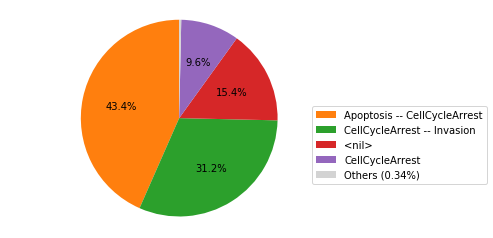

In [4]:
result.plot_piechart()

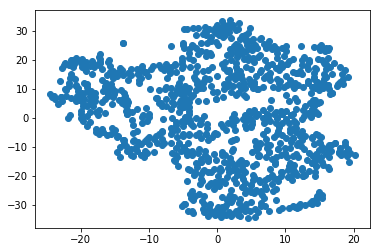

In [5]:
result.plotTSNESteadyStatesNodesDistribution(perplexity=50)

### More T-SNEs, this time with all possible outputs
### This should help find clusters

In [26]:
simulation_alloutputs = simulation.copy()
simulation_alloutputs.set_outputs(simulation_alloutputs.nodes)
res_ao = simulation_alloutputs.run()

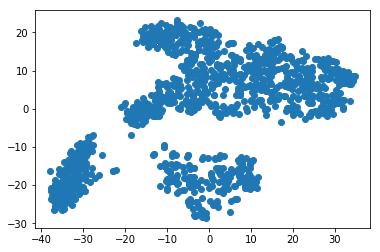

In [21]:
res_ao.plotTSNESteadyStatesNodesDistribution(perplexity=50)

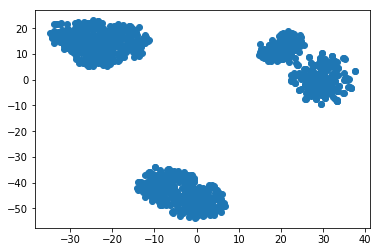

In [27]:
res_ao.plotTSNESteadyStatesDistribution(perplexity=50)

### We can also use filters on T-SNEs, as with this mutant analysis

In [28]:
simulation_mutant = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=50000,
    thread_count=6,
    istate={
        'DNAdamage': (0.5, 0.5),
        'ECMicroenv': (0.5, 0.5),
    },
    max_time=50, time_tick=1,
    outputs=[
        'Apoptosis', 'CellCycleArrest', 'Invasion'
    ],
    mutations={"NICD": "ON", "p53": "OFF"},
    individual_results=True,
    random_sampling=True
)

result_mutant = simulation_mutant.run()

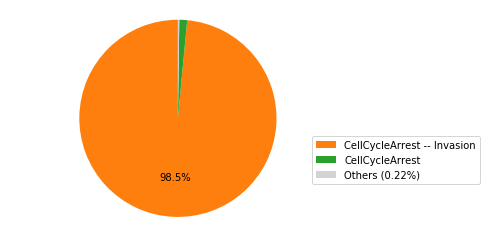

In [29]:
result_mutant.plot_piechart()

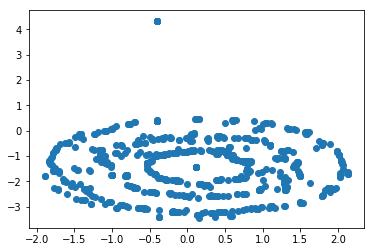

In [30]:
result_mutant.plotTSNESteadyStatesNodesDistribution(perplexity=50)

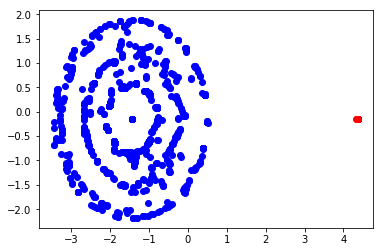

In [31]:
result_mutant.plotTSNESteadyStatesNodesDistribution(perplexity=50, filter="Invasion < 1.0")

In [34]:
result_mutant.get_individual_nodes_probtraj(filter="Invasion < 1.0").std()

CellCycleArrest    0.000000
Apoptosis          0.167749
Invasion           0.074616
dtype: float64